# Performance Summit 2019 - Analysis workshop (level it up)
## Part 1 - Data pre-processing

You have probably played with notebooks in the past and this isn't the first time somebody tries to sell them to you  as the next big thing. I know for sure that didn't end well, but I also know exactly what you need to get the hang of it. It isn't about playing around with the notebook, it is all about playing around with **YOUR OWN DATA**.

This notebook will guide you through the Python/Pandas/DataFrame/NumPy fundamentals while it helps you answer basic performance questions of the **`"performance-training-java-app"`** application.

We have the following specific goals:

1. To add one more powerful tool to your analysis toolbox: Jupyter Notebooks/Python
2. To learn a little about data preprocessing
3. To answer the typical analysis question using something other than a spreadsheet or a Kibana dashboard
4. To scratch the tip of the iceberg on how powerful notebooks can really be

### Loading the data set in memory

Just think of a panda bear reading a CSV file. What will you ask the panda bear to do? *Panda, please read the csv file and load it into a variable*. Something like:

```
df = pd.read_csv('data.csv')
```

When we imported pandas library above, we put an alias to it so we can use the shorthand `pd`. Also, `df` is a common variable name to store a [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html#pandas.DataFrame).

After we have loaded the CSV file, is common practice to print out the first 5 records of it to get an idea of its contents by using:

```
df.head()
```

or just to print the head and the tail with:

```
df
```

Lets get hands on with this!

Please load the dataset into a variable and print its first five rows. Then repeat the process but just load the columns we're going to work with:
```
['timeStamp', 'elapsed', 'label', 'responseCode', 'responseMessage', 'success', 'failureMessage', 'allThreads']
```

In [440]:
import pandas as pd # For dataframe manipulation
import numpy as np  # Numeric utilities for scalars, arrays and dataframes
from matplotlib import pyplot as plt # For plotting purposes

# This two to make this notebook interactive by adding form controls
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

# Just a directive to show the plots inside the notebook
%matplotlib inline

print('Awesome! I just loaded the necessary libraries to get you started')

Awesome! I just loaded the necessary libraries to get you started


In [1]:
# Write your code here



#### Extra
> There's also a shorthand function to describe the most common characteristics of the numeric variables in the dataset. Please try it out:
```
df.describe()
```

In [2]:
# Write your code here



### Indexing the dataframe

Index the dataframe properly. Indexing is the process by which you give each row in the dataset a meaningful context that allows to precisely locate it within the dataframe. In this case, since we have time series information, we will build a time index with the `timeStamp` column.

```
# Date time processing utilities
from datetime import datetime

df['time'] = [datetime.fromtimestamp(int(t / 1000)) for t in df.timeStamp]
df.set_index(['time', 'label'], inplace=True)
```

In [3]:
# Write your code here



### The 'final' transform
To make something useful out of JMeter's output data, we need one more final transform into a time series  aggregated per second, minute or hour; or, to transform directly into an scalability model grouped by number of threads. The output you decide depends on the type of analysis you are running on the data.

For this demonstration we will study the dataset first from the time perspective and then we will build the scalability model of the app.

The following code snippet will aggregate the `elapsed` response time for all the transactions per second using the average (mean) of all samples within each second.

```
df.pivot_table(index='time', values='elapsed')
```

If you are already familiar with Excel's pivot tables, this will be easy peasy.

For the `pivot_table` function you may use the following arguments:

- `index`: What goes in the rows
- `columns`: What goes in the columns
- `values`: The values to aggregate per each combination of rows and columns.
- `aggfunc`: Aggregation function to apply on the values. It can be a list or a dict with the list of functions to apply to each column.
- ...

Check the online docs for more information.

All by yourself try to create a more usefult representation of this dataset using the `pivot_table` function:

```
                                          allThreads    elapsed         \
                                                 max       mean median   
time                label                                                
2019-05-26 00:11:48 Add REST Service              15  54.020408   54.0   
                    Divide REST Service           14   2.011905    2.0   
                    Multiply REST Service         14   0.523810    0.0   
                    Subtract REST Service         14   0.392857    0.0   
2019-05-26 00:11:49 Add REST Service              20  53.910448   54.0   

                                          throughput  
                                                 sum  
time                label                             
2019-05-26 00:11:48 Add REST Service              98  
                    Divide REST Service           84  
                    Multiply REST Service         84  
                    Subtract REST Service         84  
2019-05-26 00:11:49 Add REST Service             335  
...
```

In [7]:
# Write your code here



### Data reshaping
Now that you're familiar with some of the common pivoting functions of the dataframes, let's load the JVM monitoring data from the `jvm_monitoring.csv` file.

For this exercise, first try to understand the data structure and then try to develop an appropriate script to transform it into an useful format. The final output should look like:

```
metric	HeapMemoryMax	HeapMemoryUsed	MarkSweep CollectionCount	MarkSweep CollectionTime	ProcessCpuLoad	Scavenge CollectionCount	Scavenge CollectionTime	ThreadCount
time								
2019-05-26 00:11:48	3.817865e+09	1.313455e+09	NaN	NaN	0.003434	NaN	NaN	219.0
2019-05-26 00:11:49	3.817865e+09	1.335586e+09	0.0	0.0	0.022129	0.0	0.0	219.0
2019-05-26 00:11:50	3.817865e+09	1.412646e+09	0.0	0.0	0.054181	0.0	0.0	219.0
2019-05-26 00:11:51	3.817865e+09	3.146421e+08	0.0	0.0	0.070094	1.0	25.0	219.0
2019-05-26 00:11:52	3.817865e+09	3.944750e+08	0.0	0.0	0.048571	0.0	0.0	219.0
```

In [8]:
# Write your code here



### Handling missing values: imputation

In [9]:
# Write your code here

from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
jvm_df_final = pd.DataFrame(imp.fit_transform(jvm_df), index=jvm_df.index, columns=jvm_df.columns)
jvm_df_final.plot(figsize=(15,6), logy=True)

NameError: name 'np' is not defined

### Merging datasets

In [447]:
df_agg = df.pivot_table(index='time', values=['allThreads', 'elapsed', 'throughput'], aggfunc={ 'allThreads': 'max', 'elapsed': ['mean', 'median'], 'throughput': 'sum' })
df_full = pd.merge(df_agg, jvm_df_final, how='left', on='time')
df_full

/Users/agiraldo/anaconda3/lib/python3.7/site-packages/pandas/core/reshape/merge.py:522: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


,"(allThreads, max)","(elapsed, mean)","(elapsed, median)","(throughput, sum)",HeapMemoryMax,HeapMemoryUsed,MarkSweep CollectionCount,MarkSweep CollectionTime,ProcessCpuLoad,Scavenge CollectionCount,Scavenge CollectionTime,ThreadCount
time,,,,,,,,,,,,
2019-05-26 00:11:48,15,15.828571,1.0,350,3.817865e+09,1.313455e+09,0.0,0.0,0.003434,0.162791,5.05814,219.0
2019-05-26 00:11:49,20,14.389434,1.0,1325,3.817865e+09,1.335586e+09,0.0,0.0,0.022129,0.000000,0.00000,219.0
2019-05-26 00:11:50,20,14.305496,1.0,1401,3.817865e+09,1.412646e+09,0.0,0.0,0.054181,0.000000,0.00000,219.0
2019-05-26 00:11:51,20,14.337739,1.0,1362,3.817865e+09,3.146421e+08,0.0,0.0,0.070094,1.000000,25.00000,219.0
2019-05-26 00:11:52,35,14.749137,1.0,1738,3.817865e+09,3.944750e+08,0.0,0.0,0.048571,0.000000,0.00000,219.0
2019-05-26 00:11:53,40,14.589118,1.0,2665,3.817865e+09,4.950001e+08,0.0,0.0,0.077898,0.000000,0.00000,219.0
2019-05-26 00:11:54,40,14.430440,1.0,2753,3.817865e+09,6.471374e+08,0.0,0.0,0.084244,0.000000,0.00000,219.0
2019-05-26 00:11:55,40,14.634256,1.0,2674,3.817865e+09,8.016208e+08,0.0,0.0,0.081802,0.000000,0.00000,219.0
2019-05-26 00:11:56,55,15.072812,2.0,2994,3.817865e+09,9.515775e+08,0.0,0.0,0.082463,0.000000,0.00000,219.0


## Part 2 - Data exploration
You have to "feel" the data. If you don't get a feeling of the data you're working with, it is very hard to provide answers to the questions you have. In order to "feel" the data you must gain a deeper understanding of the information by exploring it and playing with it, and this can be gained through descriptive stats and plotting of the information in the dataset.

In this section you will answer some basic performance questions of the `performance-training-java-app`.

### Performance questions

Now that we are familiar with our dataframe, let's try to answer some basic performance questions about the four endpoints being tested.

- Which one is the slowest endpoint?
- Which one is the fastest?
- Which one is the most stable?
- Which one is the least stable?

**HINT**: Try using a [pivot table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) and the functions `highlight_min` and `highlight_max`.

**NOTE**: You get extra points for the 90th percentile.

In [12]:
# Write your code here



### Dataframe filtering
There are many ways to filter the information from a dataframe:
- You can retrieve a fixed range of data points from the dataframe. Example: `df[0:5]` to get the first five rows or `df[-1:]` to get the last one.
- You can retrieve an specific column with `df['elapsed']`.
- You can compute stats over a specific column using, for example, `df['elapsed'].mean()` to compute the average response time of all the dataset.
- You can query the dataframe with the `query` method by specifying a filter statetment like for example: `df.query('elapsed > 60')`, which will get the data points whose average response time is higher than 60 ms.
- You can also apply the same query by using `df[(df['elapsed'] > 60)]`. Test it with: `all(df.query('elapsed > 60') == df[(df['elapsed'] > 60)])`

Try them all and check the results!

In [11]:
# Write your code here



## Part 3 - Plotting
There's certainly not better way to get a feel of the data than plotting it. This section will illustrate common  charts from the performance data. Just walk through it, feel free to play and when you're done, jump to the next section and try to build the full scalability model of the `performance-training-java-app`.

### Raw response time per endpoint

label
Add REST Service         AxesSubplot(0.125,0.125;0.775x0.755)
Divide REST Service      AxesSubplot(0.125,0.125;0.775x0.755)
Multiply REST Service    AxesSubplot(0.125,0.125;0.775x0.755)
Subtract REST Service    AxesSubplot(0.125,0.125;0.775x0.755)
Name: elapsed, dtype: object

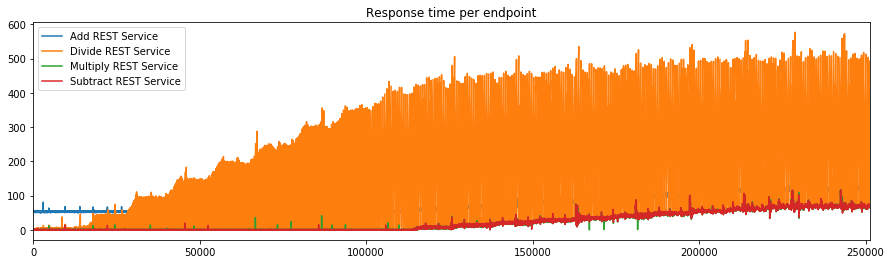

In [450]:
raw_df = pd.read_csv('data.csv', usecols=['timeStamp', 'elapsed', 'label', 'responseCode', 'responseMessage', 'success', 'failureMessage', 'allThreads'])
raw_df.groupby('label')['elapsed'].plot(figsize=(15,4), legend=True, title='Response time per endpoint')

### Raw response time per endpoint (first 200 points)

label
Add REST Service         AxesSubplot(0.125,0.125;0.775x0.755)
Divide REST Service      AxesSubplot(0.125,0.125;0.775x0.755)
Multiply REST Service    AxesSubplot(0.125,0.125;0.775x0.755)
Subtract REST Service    AxesSubplot(0.125,0.125;0.775x0.755)
Name: elapsed, dtype: object

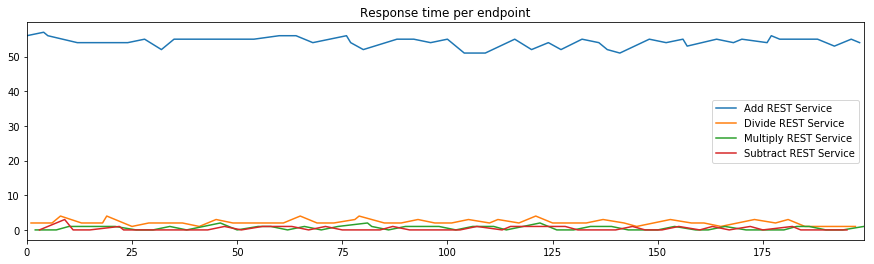

In [451]:
raw_df = pd.read_csv('data.csv', usecols=['timeStamp', 'elapsed', 'label', 'responseCode', 'responseMessage', 'success', 'failureMessage', 'allThreads'])
raw_df[0:200].groupby('label')['elapsed'].plot(figsize=(15,4), legend=True, title='Response time per endpoint')

### Raw response time per endpoint above 200 ms

label
Divide REST Service    AxesSubplot(0.125,0.125;0.775x0.755)
Name: elapsed, dtype: object

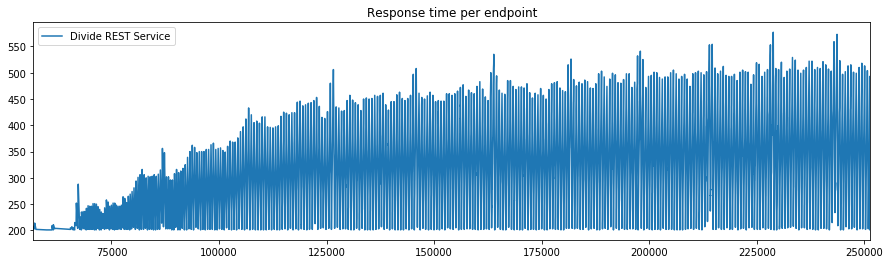

In [452]:
raw_df = pd.read_csv('data.csv', usecols=['timeStamp', 'elapsed', 'label', 'responseCode', 'responseMessage', 'success', 'failureMessage', 'allThreads'])
raw_df.query('elapsed > 200').groupby('label')['elapsed'].plot(figsize=(15,4), legend=True, title='Response time per endpoint')

### Response time over time per endpoint not fancy

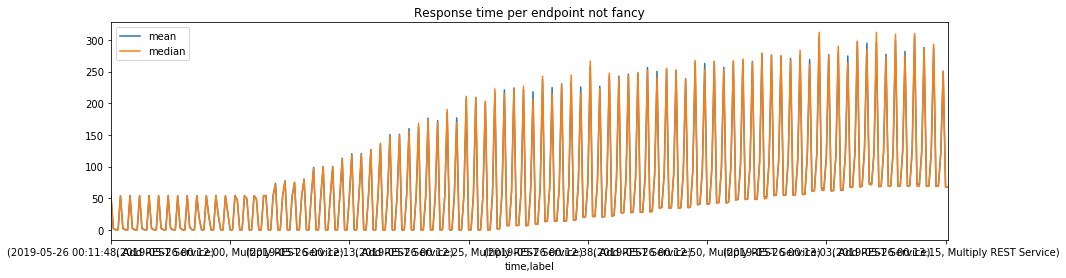

In [453]:
df_final['elapsed'].plot(figsize=(15,4), legend=True, title='Response time per endpoint not fancy')


### Response time over time per endpoint decent

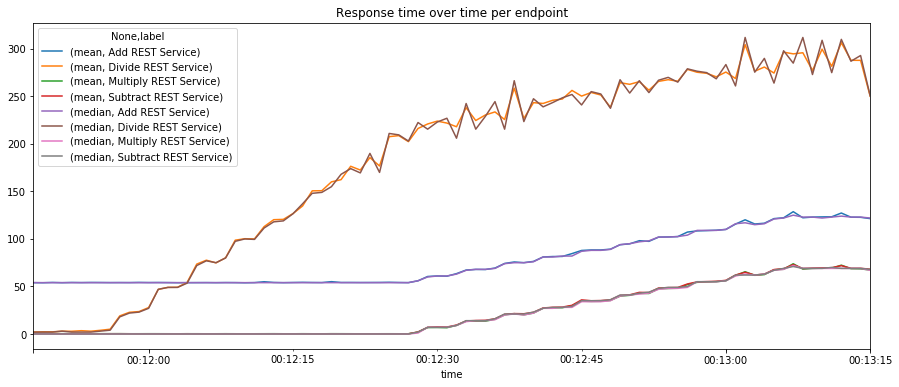

In [454]:
df_final.groupby(['time', 'label']).mean().unstack()['elapsed'].plot(title='Response time over time per endpoint', figsize=(15,6))


### Boxplot/whiskers per endpoint

Add REST Service              AxesSubplot(0.1,0.559091;0.363636x0.340909)
Divide REST Service      AxesSubplot(0.536364,0.559091;0.363636x0.340909)
Multiply REST Service             AxesSubplot(0.1,0.15;0.363636x0.340909)
Subtract REST Service        AxesSubplot(0.536364,0.15;0.363636x0.340909)
dtype: object

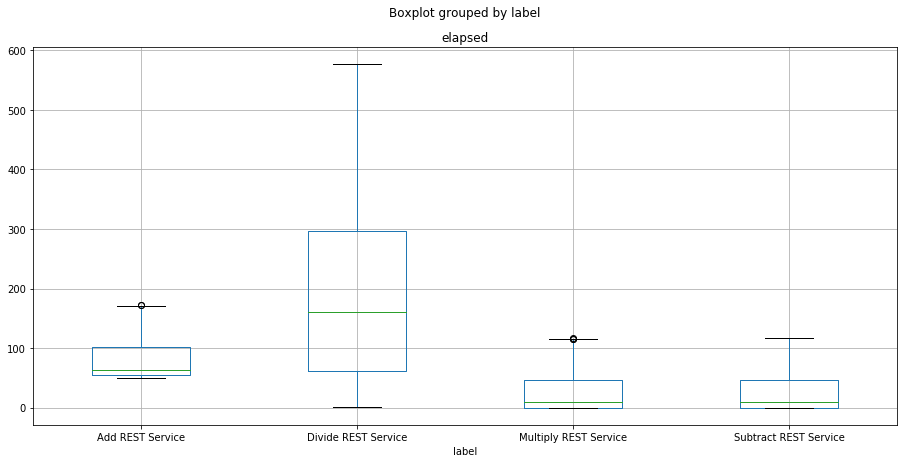

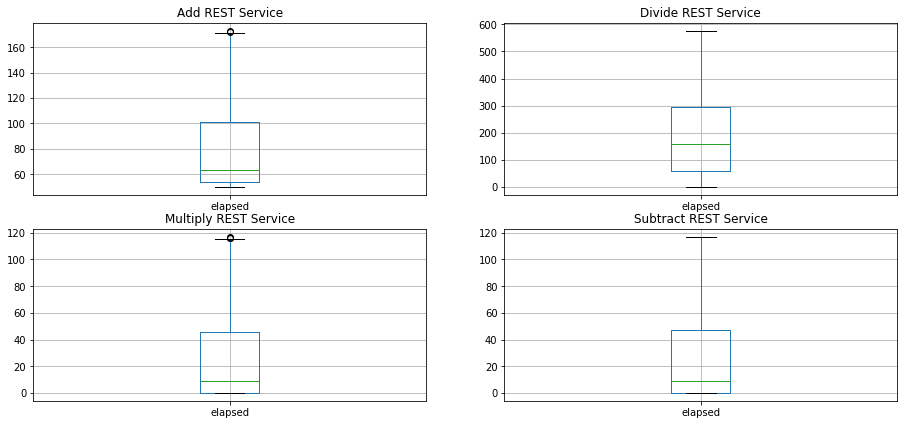

In [455]:
df.boxplot(column=['elapsed'], by='label', figsize=(15,7))
df.groupby('label').boxplot(column=['elapsed'], figsize=(15,7), sharey=False)

### Response time stability per thread group per endpoint

Add REST Service         AxesSubplot(0.1,0.736957;0.8x0.163043)
Divide REST Service      AxesSubplot(0.1,0.541304;0.8x0.163043)
Multiply REST Service    AxesSubplot(0.1,0.345652;0.8x0.163043)
Subtract REST Service        AxesSubplot(0.1,0.15;0.8x0.163043)
dtype: object

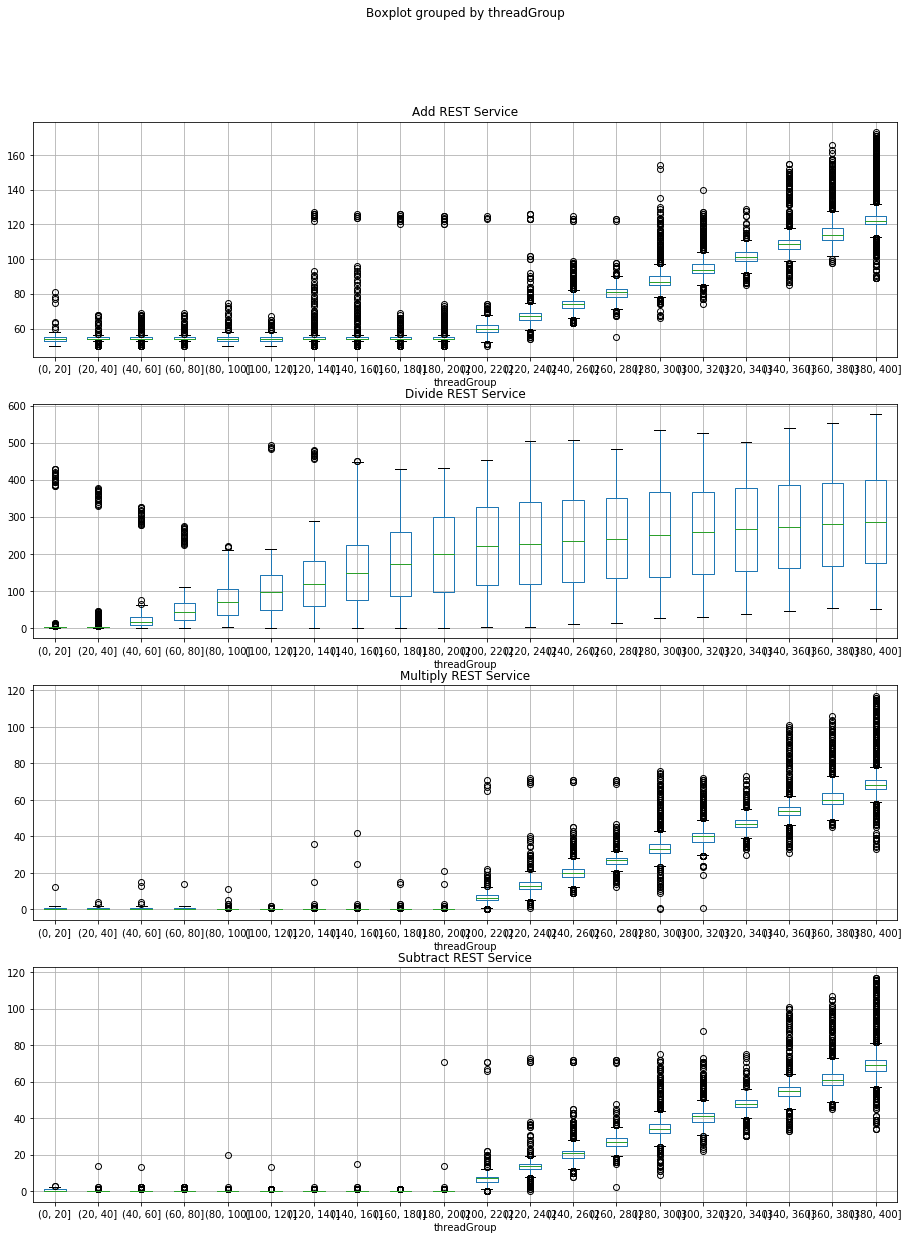

In [456]:
df['threadGroup'] = pd.cut(df['allThreads'], bins=range(0,405,20))
df
df.groupby('label').boxplot(column=['elapsed'], by='threadGroup', figsize=(15,20), layout=(4,1), sharey=False)

### Density functions and notebook interactivity

In [457]:
@interact
def histogram(label=df['label'].unique()):
    fig, ax = plt.subplots(figsize=(15,7))
    ax = df[(df['label']==label)][['elapsed']].plot.kde(ax=ax, subplots=True, legend=False, color='b')
    df[(df['label']==label)][['elapsed']].hist(ax=ax, density=True, column=['elapsed'], bins=10, color='C1')


interactive(children=(Dropdown(description='label', options=('Add REST Service', 'Divide REST Service', 'Multi…

### Response time comparison between endpoints per thread group with log scale

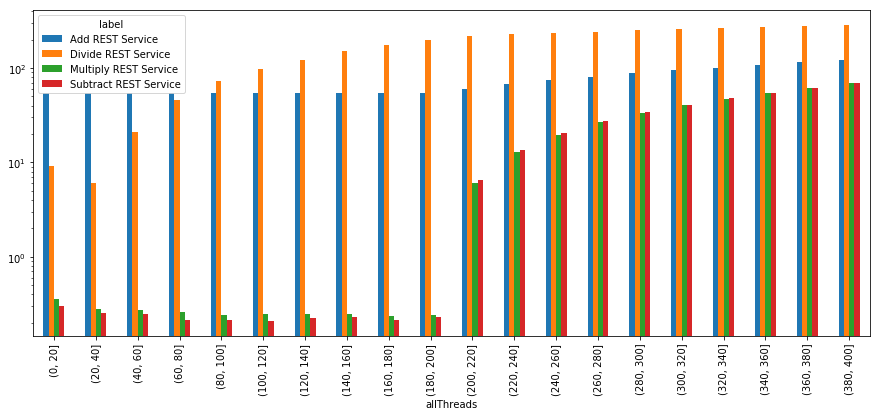

In [458]:
df.pivot_table(index=pd.cut(df['allThreads'], range(0,405,20)), columns='label', values='elapsed').plot(kind='bar', figsize=(15,6), logy=True)


### Response codes/Errors visibility

responseMessage
HTTP/1.1 200    251338
dtype: int64

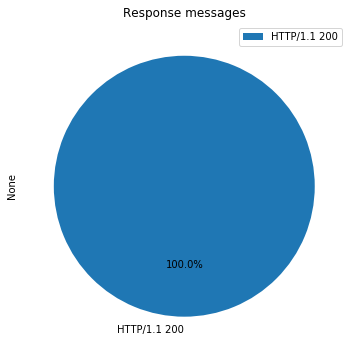

In [459]:
df.groupby(['responseMessage']).size().plot(kind='pie', title='Response messages', figsize=(15,6), autopct='%1.1f%%', legend=True, startangle=90)
df.groupby(['responseMessage']).size()

## Part 4 - Final exercise: Full scalability model
Try to generate a chart to display the full scalability model of the `performance-training-java-app` showing: response time, throughput, cpu and memory utilization per thread group. Find the knee point.

In [13]:
# Write your code here

